In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(1, '/fastdrive/sunray_data/src/')
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [3]:

%load_ext autoreload
%autoreload 2

In [4]:

#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.72143].lv1.npz')

data_set  = np.load('/fastdrive/sunray_data/RUN4/datarun4/RUN_[eps0.35]_[alpha0.8]_R1.005_20210108_070736.lv1.npz')
data_set  = np.load('/fastdrive/sunray_data/RUN3/funda/RUN_[eps0.27]_[alpha0.10371].lv1.npz')
#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.614].lv1.npz')
pat='funda'
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.15743].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.15743].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.802].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.802].lv1.npz')


#data_set  = np.load('../RUN3/f105/RUN_[eps0.354]_[alpha0.15743].lv1.npz')

#

In [5]:
dir(data_set.f)

['anis',
 'asym',
 'collect_N',
 'epsilon',
 'f_ratio',
 'freq0',
 'k_vec_0',
 'k_vec_stat_avail',
 'omega0',
 'photon_N',
 'r_vec_0',
 'r_vec_stat_avail',
 'start_phi',
 'start_r',
 'start_theta',
 'steps_N',
 't_reach_stat_avail',
 'tau_stat_avail']

In [6]:
# collect the data
anis  = data_set.f.anis
asym  = data_set.f.asym
collect_N  = data_set.f.collect_N
epsilon  = data_set.f.epsilon
f_ratio  = data_set.f.f_ratio
freq0  = data_set.f.freq0
k_vec_0  = data_set.f.k_vec_0
k_vec_stat_avail  = data_set.f.k_vec_stat_avail
omega0  = data_set.f.omega0
photon_N  = data_set.f.photon_N
r_vec_0  = data_set.f.r_vec_0
r_vec_stat_avail  = data_set.f.r_vec_stat_avail
start_phi  = data_set.f.start_phi
start_r  = data_set.f.start_r
start_theta  = data_set.f.start_theta
steps_N  = data_set.f.steps_N
t_reach_stat_avail  = data_set.f.t_reach_stat_avail
tau_stat_avail  = data_set.f.tau_stat_avail

In [7]:
import sunRay.statisticalRays as raystat

In [12]:

ang_rot = 45
#ang_rot = 0

# Important !!! rotate the initial point
r_vec_rot,k_vec_rot = raystat.rotateCoordKX(
    r_vec_stat_avail,k_vec_stat_avail,-ang_rot*np.pi/180)
r_vec0_rot,k_vec0_rot = raystat.rotateCoordKX(
    r_vec_0,k_vec_0,-ang_rot*np.pi/180)


In [13]:

(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat,idx_for_stat
    )=raystat.ImgXYtEstimate(r_vec_rot,k_vec_rot,t_reach_stat_avail,
            tau_stat_avail,r_vec0_rot, k_vec0_rot,num_t_bins=60)

x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]


In [14]:
pwd

'/fastdrive/sunray_data/src'

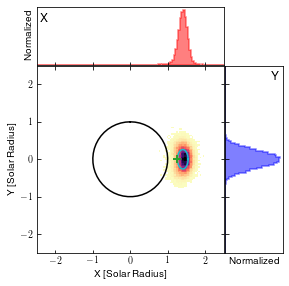

In [15]:
#hst = plt.hist2d(x_im_stat,y_im_stat,bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],weights=np.exp(-tau_stat))
#plt.axis('equal')
from sunRay.showPlot import XYDistributionImageHist

x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

fig,ax=XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,120)
            ,weights_data=weights_stat)

ax.plot(x_0,y_0,'+',color='C2',mew=2,markersize=8)

fig.savefig('img/xydist.pdf')


/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fit fail


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


fit fail
Total duration : 0.2515114660803497
Duration R/D : [0.10354 0.14798]
Vx R/D : 0.41793 , 0.42459
Vx R/D (c) : 0.97025 , 0.9857
Vy R/D : 0.0221 , -0.06048
Vy R/D (c) : 0.05131 , -0.1404
ERx R/D : 0.2686 , 0.22161
ERx R/D (Deg) : 0.14326 , 0.11819
ERx R/D : 0.90752 , 0.91838
ERx R/D (Deg) : 0.48401 , 0.4898
Size X : 0.24417 , 0.26828
Size X (Deg)0.13023 , 0.14308
Size Y : 0.42466 , 0.53811
Size Y (Deg)0.22649 , 0.28699
Offset R/D  x: 0.125074 , 0.18137
Offset R/D  y: 0.000835 , -0.002652
Peak t :0.878655


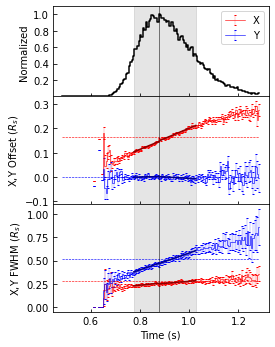

In [16]:
from sunRay.showPlot import XYVariationPlot,MuVariationPlot

fig=XYVariationPlot(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,num_t_bins = 140,x_0=x_0,y_0=y_0,offset=True)
fig[0].savefig('img/varXYt.pdf')

#print the variation make a table #TODO
# offset
# 140 in paper

In [17]:
(xc,yc,sx,sy,err_xc,err_yc,err_sx,err_sy
    ) = raystat.centroidXYFWHM(x_im_stat,y_im_stat,weights_stat)

print(xc-x_0,yc-y_0,sx,sy)

0.16594394882142494 -0.0004009104936042042 0.28369199414651486 0.5179930647821458


In [66]:
np.mean(np.sqrt(np.sum(r_vec_stat_avail**2,axis=0)))

118.34975050302252

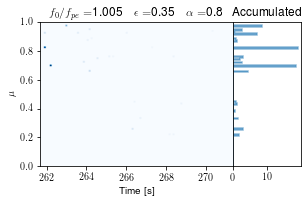

In [51]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

(fig,ax1,ax2)=MuVariationPlot(k_vec_stat_avail,t_reach_stat_avail,
                              np.exp(-tau_stat_avail),t_step = 0.05,
                    num_t_bins=100,num_mu_bins=80)

ax1.set_title(r'$f_0/f_{pe}=$'+str(np.round(f_ratio,3))+r'\quad'+
              r'$\epsilon=$'+str(np.round(epsilon,3))+r'$\quad \alpha=$'+
              str(np.round(anis,3)))

fig.savefig('img/'+pat+'_eps'+str(np.round(epsilon,3))+'a'+str(np.round(anis,3))+'.pdf')

In [52]:
mu_all = k_vec_stat_avail[2,:]/np.sqrt(np.sum(k_vec_stat_avail**2,axis=0))

In [63]:
(np.sqrt(np.sum(r_vec_stat_avail**2,axis=0))).shape

(16,)

In [65]:
np.mean(np.exp(-tau_stat_avail))


1.942532516676863e-05

In [28]:
# make a movie
if True:
    from sunRay import showPlot as sp
    x0,y0=np.mean(r_vec0_rot,axis=1)[0],np.mean(r_vec0_rot,axis=1)[1]
    fr_cur=sp.MovieVariationXY(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_step = 0.02,
                               num_t_bins=-1,xlim=[0,2],ylim=[-1,1],x_0=x0,y_0=y0,
                               title_this=r'$f_0/f_{pe}='+str(np.round(f_ratio,3))+r'$\quad'+
                  r'$\epsilon='+str(np.round(epsilon,3))+r'\quad \alpha='+
                  str(np.round(anis,3))+r'\quad\theta_0='+str(np.round(ang_rot,3))+'$',
                               orintation=0,dpi=300,save_dir = 'moviedir/hori/')
    #plt.gca().set_clim([0,1])
    #fr_cur.savefig('test_movie.png')

/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amax/anaconda3/envs/torch15/lib/python3.8/site-packages/numpy/core/_method

<Figure size 432x288 with 0 Axes>

In [24]:
plt.close()

In [18]:
np.sqrt(np.sum(r_vec_stat_avail**2,axis=0))

array([16.97647389, 16.9765446 , 16.9765167 , ..., 16.97661518,
       16.97659707, 16.97653564])

In [19]:
k_vec_stat_avail.shape[0]

3

In [20]:
np.histogram(np.array([1,2,3]),bins=np.linspace(0,30,50))

(array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25.10204082, 25.71428571, 26.32653061, 26.93877551,
        27.55102041, 28.16326531, 28.7755102 , 29.3877551 , 30.        ]))

In [21]:
import sunRay.plasmaFreq as pfreq

import numpy as np 
import torch
from sunRay.parameters import c_r
from sunRay import plasmaFreq as pfreq
from sunRay import densityModel as dm
from scipy import integrate
from scipy.optimize import curve_fit

In [22]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0))**2)) ) ,1.4,215 )[0]

496.296688385845

In [23]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0*1.5))**2)) ) ,1.4,215 )[0]

496.0241876873643

In [24]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [13]:
'1'.rjust(3,'0')

'001'

In [221]:
x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

array([8.75033375e-01, 1.48617948e-08])

In [198]:
r_vec0_rot

array([[ 8.74904070e-01,  8.75072607e-01,  8.75059350e-01, ...,
         8.75124239e-01,  8.74971592e-01,  8.75116448e-01],
       [ 5.84294612e-05,  1.10376946e-04,  1.09373301e-04, ...,
         4.66776619e-05, -1.26895538e-04,  6.18316844e-05],
       [ 1.51561512e+00,  1.51553199e+00,  1.51559058e+00, ...,
         1.51554513e+00,  1.51557091e+00,  1.51552940e+00]])

In [292]:
1/c_r

2.321547698465644

In [310]:
205/215

0.9534883720930233

In [9]:

            flux_all = np.sum(weights_stat)/photon_N

In [10]:
flux_all

0.023393052241406653